In [1]:
from matplotlib import pyplot as plt

In [2]:
from numpy import array
from numpy.linalg import norm
from math import pi
import numpy as np
from IK import L0, L12, L23, L34, L45, bodyH
from IK import ALL_FEET_DOWN_TIME_FRAC, TRANSITION_FRAC, FH_FRAC, FH, Gaits
legLen = 1.05*L0
# L0 is the dynamic length of the leg? from pivot to ground contact?

In [3]:
print(L0, L12,L34, L45, bodyH)

110 58 67 57 150


Now what am I doing?

In [4]:
loopLength = 10000
travRate = 25
times= []
points = []

half_loopLength = loopLength/2.0
double_travRate = 2 * travRate
gait = Gaits()

# TODO move this
ms = 0 #0
turnTimeOffset = 0 # probalby don't need this for now except as placeholder
now2 = (ms - turnTimeOffset) % loopLength
now3 = (ms - turnTimeOffset +  half_loopLength) % loopLength
now4 = loopLength - (ms - turnTimeOffset) % loopLength
now1 = loopLength - (ms - turnTimeOffset + half_loopLength) % loopLength

gait.initTrig()
gait.walkCode(loopLength, half_loopLength, travRate, 2*travRate,
              now1, now2, now3, now4, 0.0)

In [5]:
for vec in (gait.v12, gait.v23, gait.v34):
    print(vec, norm(array(vec)))
          
print("Foot heights:", gait.footH13, gait.footH24)
print("Raw angles:", gait.alph1*180/pi, gait.alph2*180/pi, gait.alph3*180/pi)

[-1.0, 0] 1.0
[56.395687212256526, -28.080713378711124] 63.0
[-16.567625798011747, 64.91928662128886] 67.0
Foot heights: 0 0
Raw angles: 66.81654763915054 37.499948695286335 40.34677525864541


In [6]:
# calculate the points I want to plot:
pt1 = array([L0, 0])
pt2 = pt1 + array([L12,0])
pt3 = pt2 + gait.v23 # we do this negative in the code, too
pt4 = pt3 + [gait.v34[0], -gait.v34[1]]
pt5 = pt4 + [0, -L45]
pt0 = pt1 - [0, bodyH]

pts = array([pt0, pt1, pt2, pt3, pt4, pt5])

for pt in pts:
    print(pt)

[ 110. -150.]
[110.   0.]
[168.   0.]
[224.39568721 -28.08071338]
[207.82806141 -93.        ]
[ 207.82806141 -150.        ]


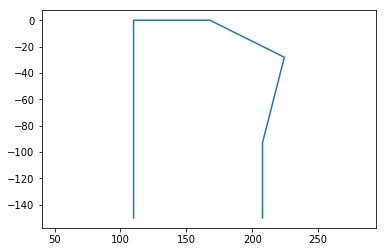

In [7]:
plt.figure()
ax1 = plt.subplot(1,1,1)
xvals, yvals = np.transpose(pts[:])
ax1.set_aspect('equal', 'datalim')
ax1.plot(xvals, yvals)

In [8]:
dir(ax1)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_cachedRenderer',
 '_clipon',
 '_clippath',
 '_connected',
 '_contains',
 '_current_image',
 '_cursorProps',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_legend_handles',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_hold',
 '_init_axis',
 '_label',
 '_left_title',
 '_make_twin_axes',
 '_mouseover',
 '_navigate',
 '_navigate_mode',


In [9]:
help(plt.interactive)

Help on function interactive in module matplotlib:

interactive(b)
    Set interactive mode to boolean b.
    
    If b is True, then draw after every plotting command, e.g., after xlabel



In [10]:
L45

57